##영상의 경계(edge) 추출하기

인공지능공학부 20214252 김혜인

1. 침식연산 후 픽셀 빼기 연산 : 침식연산을 한 결과와 입력영상의 차이를 활용하여 경계를 추출한다.
2. 소벨 에지 검출 : cv2.Sobel()코드를 이용하여 경계를 추출한다.

두 가지 연산을 진행한 후 그 결과를 비교한다.

In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


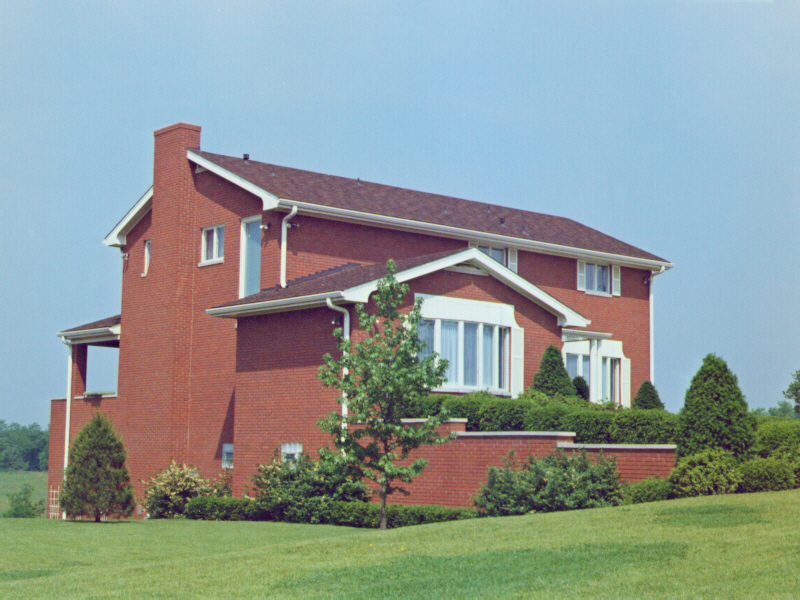

In [2]:
# 사용할 이미지의 원본 이미지

img = cv2.imread('/content/gdrive/My Drive/Images/home3.jpg')
cv2_imshow(img)

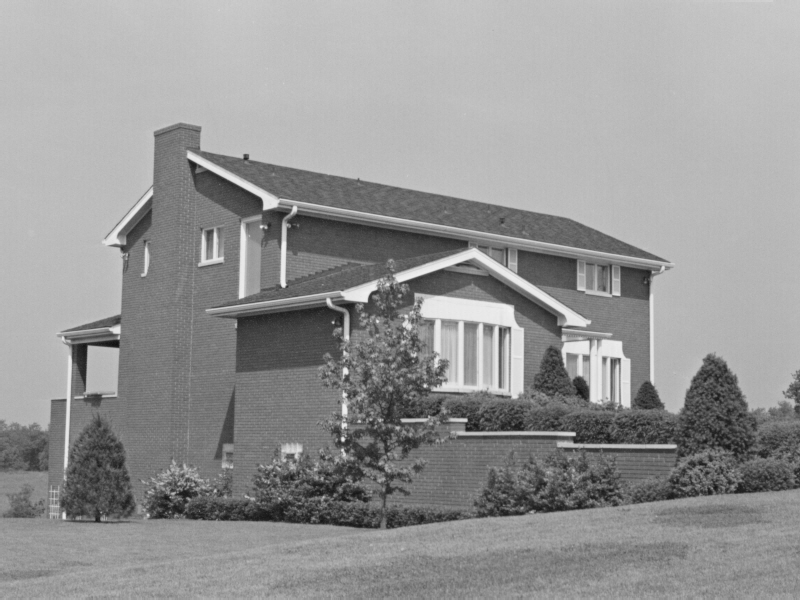

In [3]:
# 영상처리를 진행하기 위해 원본 이미지를 그레이 영상으로 불러온다.

img = cv2.imread('/content/gdrive/My Drive/Images/home3.jpg', 0)
cv2_imshow(img)

Original Img


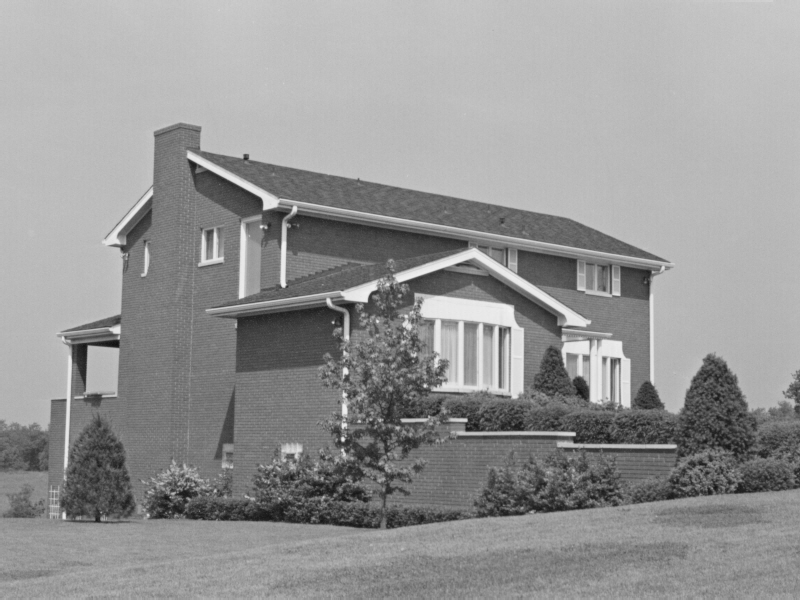

Nearest Neighbor Interpolation


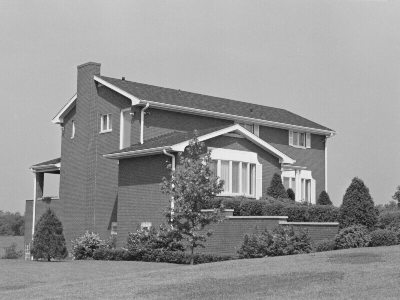

In [4]:
# 최근접 이웃 보간법으로 이미지 축소하기

output_img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_NEAREST)

print("Original Img")
cv2_imshow(img)
print("Nearest Neighbor Interpolation")
cv2_imshow(output_img)

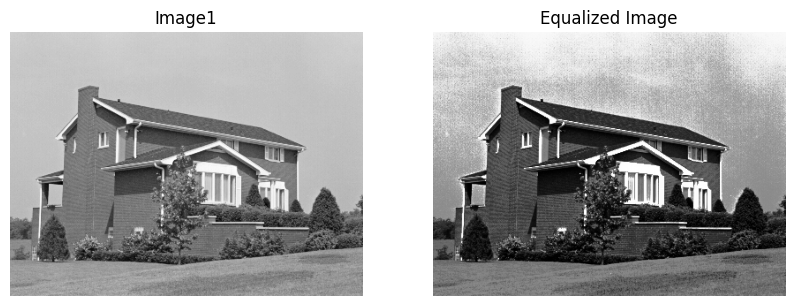

In [5]:
# 히스토그램 평활화를 이용하여 사용할 영상 화질 향상하기

hist_img = cv2.equalizeHist(output_img)
hist = cv2.calcHist([output_img], [0], None, [256], [0,256])

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Image1")
plt.imshow(output_img, cmap='gray')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(hist_img, cmap='gray')
plt.axis("off")
plt.show()

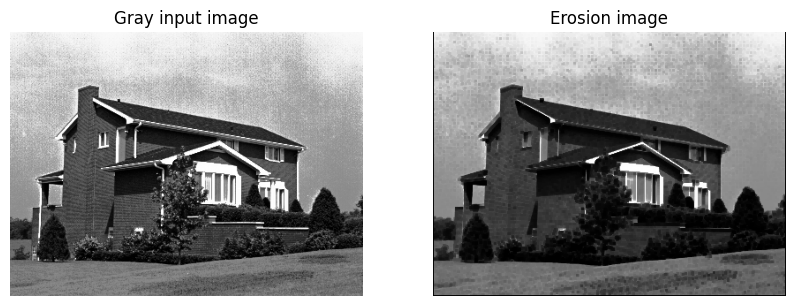

In [6]:
# 침식연산

gray = hist_img

height, width = gray.shape

out = np.zeros((height+2, width+2),dtype=np.uint8)
out[1:height+1, 1:width+1] = gray.copy()
erosion = np.zeros_like(gray)
dilation = np.zeros_like(gray)

for i in range(height):
    for j in range(width):
        temp = out[i:i+3, j:j+3]
        erosion[i][j]=np.min(temp)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Gray input image")
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Erosion image")
plt.imshow(erosion, cmap='gray')
plt.axis("off")
plt.show()

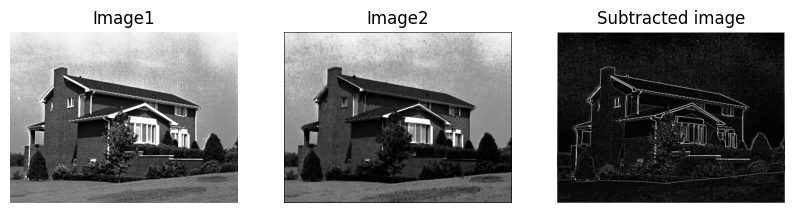

In [7]:
# 원 영상과 침식영상의 빼기 연산으로 에지 검출

RGB_img1 = cv2.cvtColor(hist_img, cv2.COLOR_BGR2RGB)
RGB_img2 = cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB)
edge_img = cv2.cvtColor(hist_img, cv2.COLOR_BGR2RGB)

R_img1, G_img1, B_img1 = cv2.split(RGB_img1)
R_img2, G_img2, B_img2 = cv2.split(RGB_img2)

R_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]), dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]), dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]), dtype=np.ubyte)

for h in range(RGB_img1.shape[0]):
    for w in range(RGB_img1.shape[1]):
        R_plus[h,w] = np.abs(np.int32(R_img1[h,w]) - np.int32(R_img2[h,w]))
        G_plus[h,w] = np.abs(np.int32(G_img1[h,w]) - np.int32(G_img2[h,w]))
        B_plus[h,w] = np.abs(np.int32(B_img1[h,w]) - np.int32(B_img2[h,w]))

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title("Image1")
plt.imshow(RGB_img1, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Image2")
plt.imshow(RGB_img2, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 3)
edge_img[:,:,0]=R_plus
edge_img[:,:,1]=G_plus
edge_img[:,:,2]=B_plus
plt.title("Subtracted image")
plt.imshow(edge_img, cmap='gray')
plt.axis("off")
plt.show()

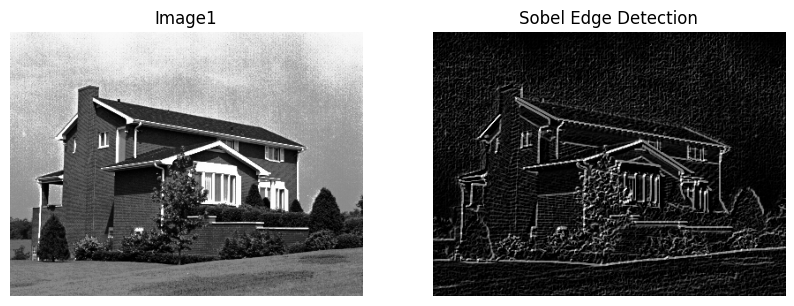

In [8]:
# 소벨 에지 검출

x = cv2.Sobel(hist_img, -1,1,0)
y = cv2.Sobel(hist_img, -1,0,1)

absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
sobel_img = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Image1")
plt.imshow(hist_img, cmap='gray')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_img, cmap='gray')
plt.axis("off")
plt.show()

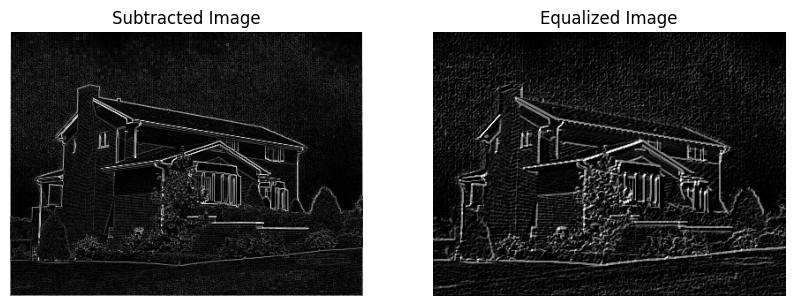

In [9]:
# 두 가지의 에지 검출 연산 결과 비교하기

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Subtracted Image")
plt.imshow(edge_img, cmap='gray')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(sobel_img, cmap='gray')
plt.axis("off")
plt.show()

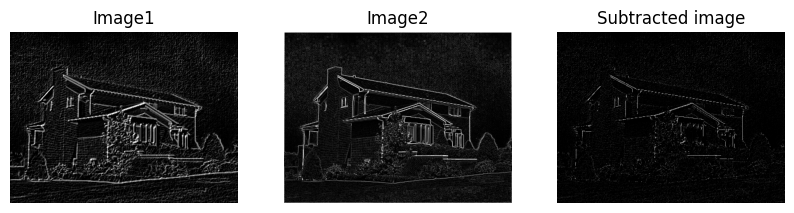

In [10]:
RGB_img1 = cv2.cvtColor(sobel_img, cv2.COLOR_BGR2RGB)
RGB_img2 = cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB)
and_img = cv2.cvtColor(sobel_img, cv2.COLOR_BGR2RGB)

R_img1, G_img1, B_img1 = cv2.split(RGB_img1)
R_img2, G_img2, B_img2 = cv2.split(RGB_img2)

R_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]), dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]), dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]), dtype=np.ubyte)

def saturation(value):
    if (value>255):
        value = 255;
    return value

for h in range(RGB_img1.shape[0]):
    for w in range(RGB_img1.shape[1]):
        R_plus[h,w] = saturation(np.int32(R_img1[h,w]) & np.int32(R_img2[h,w]))
        G_plus[h,w] = saturation(np.int32(G_img1[h,w]) & np.int32(G_img2[h,w]))
        B_plus[h,w] = saturation(np.int32(B_img1[h,w]) & np.int32(B_img2[h,w]))

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title("Image1")
plt.imshow(RGB_img1, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Image2")
plt.imshow(RGB_img2, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 3)
and_img[:,:,0]=R_plus
and_img[:,:,1]=G_plus
and_img[:,:,2]=B_plus
plt.title("Subtracted image")
plt.imshow(and_img, cmap='gray')
plt.axis("off")
plt.show()

침식연산을 진행한 후 픽셀 빼기 연산을 진행한 것보다 소벨 에지 검출 연산을 진행한 것이 조금 더 정확한 에지 검출이 이루어 진 것을 확인할 수 있다.